<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<font size=6  color=#003366> <div style="text-align: center"> Challenge 2 - Edge Detection <br><br> 

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. L. Dricot
<font size=5  color=#003366>
    
<br><br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)<br>
<div style="text-align: left">Maxence Wynen (maxence.wynen@uclouvain.be)<br>
<div style="text-align: left">Colin Vanden Bulcke (colin.vandenbulcke@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2024-2025 </div>
<br>
</font>

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> <br>
   - This assignment is due on **16th October 2024**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. **Each source of inspiration or tools must be clearly indicated.**
   - This **jupyter notebook and the images** used for this challenge must be delivered in an archive (**.zip** folder) on Moodle. The notebook will be presented in the form of a **report** with *"Markdown cells"* containing the **detailed answers** to the questions and *"Code cells"* containing the code you implemented. The answers have to be written in English, the axes and legends of the figures must be readable. <br> <br>

<font size=6 color=#009999> 2. Context and objective </font> <br> <br>

<div style="text-align: justify"> Anatomical structure segmentation on images is an important part of many medical applications. This process is difficult to automate and it can be very time-consuming if done manually. Edge detection, also called border detection, can sometimes be used in a segmentation pipeline. For this project, you will understand and implement a famous automatic edge detector called the "Canny edge detector". It is composed of the following 5 steps: <br> <br>

<div style="text-align: justify"> 1. Noise reduction: reduce image noise by using a simple gaussian filter to smooth the image. This step is useful to reduce the number of false edges in the image due to the noisy nature of medical image acquisition, and only keep the relevant edges of anatomical structures. You can use one already implemented. <br><br>

<div style="text-align: justify"> 2. Compute image gradient intensity and direction: implement a function to compute the image gradient in both direction using Sobel operator. These images can then be combined to compute the norm and the slope direction of the gradient. This step is useful to compute the transition in constrast in the image.
    
$$ |G| = \sqrt{G_{x}^{2}+G_{y}^{2}} $$ 
 
$$ \theta (x,y) = arctan(\frac{G_{y}}{G_{x}}) $$ <br><br>


<div style="text-align: justify"> 3.	Edge thinning: the next step is to reduce the borders thickness. You can use the function ’thinning’ given by the assistant in the template to do this step. <br> <br>

<div style="text-align: justify"> 4.	Double thresholding: the double threshold step aims at separating borders into 2 classes, strong borders when the intensity is above the strong threshold and weak borders when the intensity is between the weak threshold and the strong threshold, the rest of the pixels can be put to a background value of 0. You can use for example as strong and weak threshold 10% and 5% of the max value of the image respectively. Playing with the threshold can improve the final edge detection.<br> <br>
 
<div style="text-align: justify"> 5.	Weak borders evaluation: based on the threshold results, the last step consists of sorting the weak borders into strong borders or background. Weak borders must be transformed to strong ones if at least one of the pixels around the one being processed is a strong border. If not, a weak border joins the dark side. <br> <br>

The following 3 images are available to test your Canny edge detector implementation:
* A sagittal view of a CT scan of a pregant women.
* An axial view of a CT scan of subject bearing a lung tumor.
* An xial view of a T2w MRI image of brain at the level of the tentorium cerebelli.
    

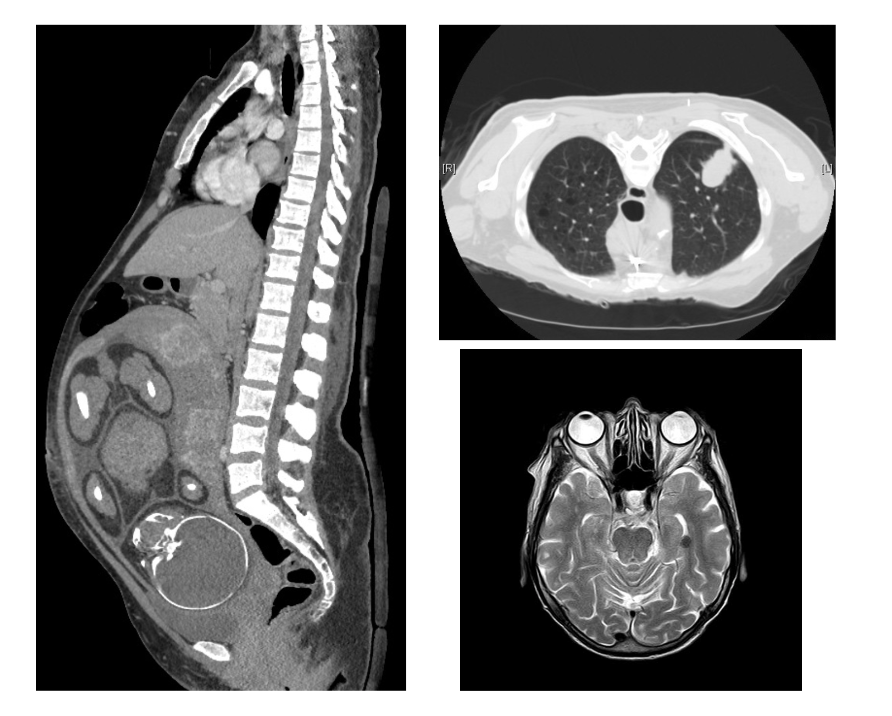

In [ ]:
from scipy.ndimage import convolve, gaussian_filter
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

img = imread('CT_Lung.jpg')[:, :, 0].astype(np.float64)
img2 = imread('CT_Pregnancy.jpg')[:, :, 0].astype(np.float64)
img3 = imread('MRI_Brain.jpg').astype(np.float64)

<font size=6 color=#009999> 3. Canny Edge Detector </font> <br> <br>

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
Implement a Canny Edge Detector using the 5 steps described above. 

In [1]:
# The use of the 'thinning' function will be required

def thinning(img, angles):

    """
    :param img: The image on which the edges have to be thinned.
    :param angles: An angle image of the same size as img, which contain the direction of the gradient slope of img on each point as angles in radians
    :return: a thinned img
    """

    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = angles * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j + 1]
                    r = img[i, j - 1]
                # angle 45
                elif (22.5 <= angle[i, j] < 67.5):
                    q = img[i + 1, j - 1]
                    r = img[i - 1, j + 1]
                # angle 90
                elif (67.5 <= angle[i, j] < 112.5):
                    q = img[i + 1, j]
                    r = img[i - 1, j]
                # angle 135
                elif (112.5 <= angle[i, j] < 157.5):
                    q = img[i - 1, j - 1]
                    r = img[i + 1, j + 1]

                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Show and comment the result after each step of the pipeline. Discuss the influence of the constant that you used ($\sigma$ for Gaussian filtering, and thresholds for the double thresholding step).

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
Explain how the "thinning" function works for the step 3. 

<div class="alert alert-info">
<b>QUESTION BONUS</b>  <br>
Show the resulting borders in color on top of the original images. 